# Examining Seattle Das-transport_system

In [1]:
from dasquakes import *
import datetime
import numpy as np

In [2]:
cable='seadasn'
record_length = 10 #minutes
#at night
#t0 = datetime.datetime(2022, 11, 10, 10, 41, 0) #2am local hours
t0 = datetime.datetime(2022, 11, 23, 23, 41, 0) #2am local hours

In [3]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

In [4]:
nt = data.shape[0]
nx = data.shape[1]
print(f'Number of time steps: {nt}, Number of channels: {nx}')

print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

Number of time steps: 60000, Number of channels: 4555
Nyquist Frequency: 50.0 Hz, cable length: 29065.238805136032 m


In [11]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,8))
plt.imshow(data,aspect='auto',vmin=-1,vmax=1)
plt.title('Ssimple image')
plt.xlabel('Channel Number', fontsize=20)
plt.ylabel('Time Step', fontsize=20)
plt.colorbar()
plt.show()

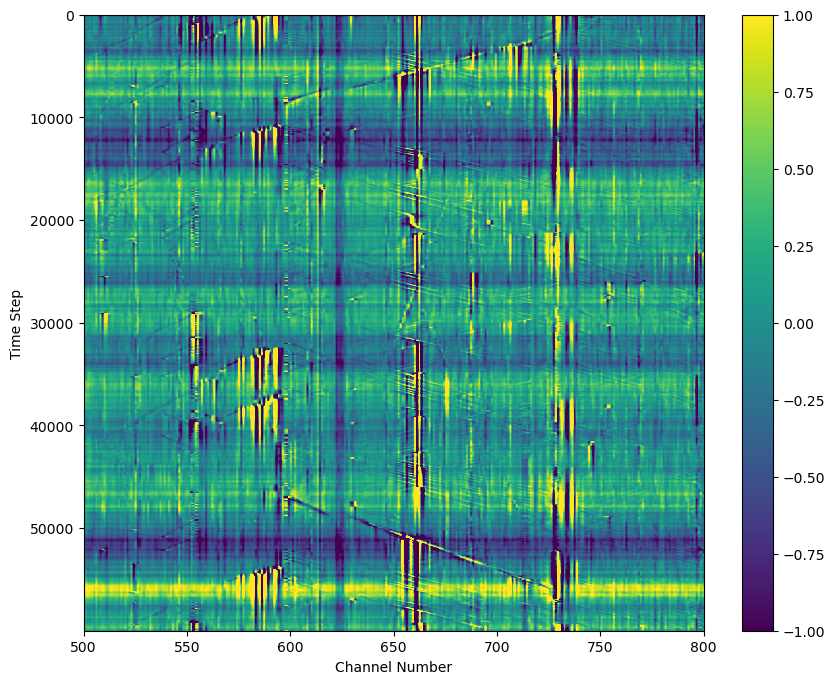

In [10]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,8))
plt.imshow(data,aspect='auto',vmin=-1,vmax=1)
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.colorbar()
plt.xlim(500,800)
plt.show()

We will focus in this number channels because according to SeaDas map this place is close to the university of washington. This image was t0 = datetime.datetime(2022, 11, 23, 23, 41, 0) ==> El día 23 de noviembre a las 3:41 pm hora seattle. We expect to see many buses and small cars in the street. Let's play a a filter to the data set.

In [28]:
#We apply a pass band filter between 0.01 to 1 hz
from scipy.signal import butter, filtfilt
#defining outputs
b,a = butter(2,[0.01,1.0],'bandpass',fs=attrs['MaximumFrequency']*2)
datafilter=filtfilt(b,a,data,axis=0)

#datafilter=filtfilt(b,a,data[::20,:],axis=0)


We get better with the filter between 0.01 to 1 hz in bigger frequencies we lost the signal

In [31]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,8))
plt.imshow(datafilter, aspect='auto', vmin=-1, vmax=1)
plt.title('data filter')
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.xlim(500,800)
plt.colorbar()
plt.show()


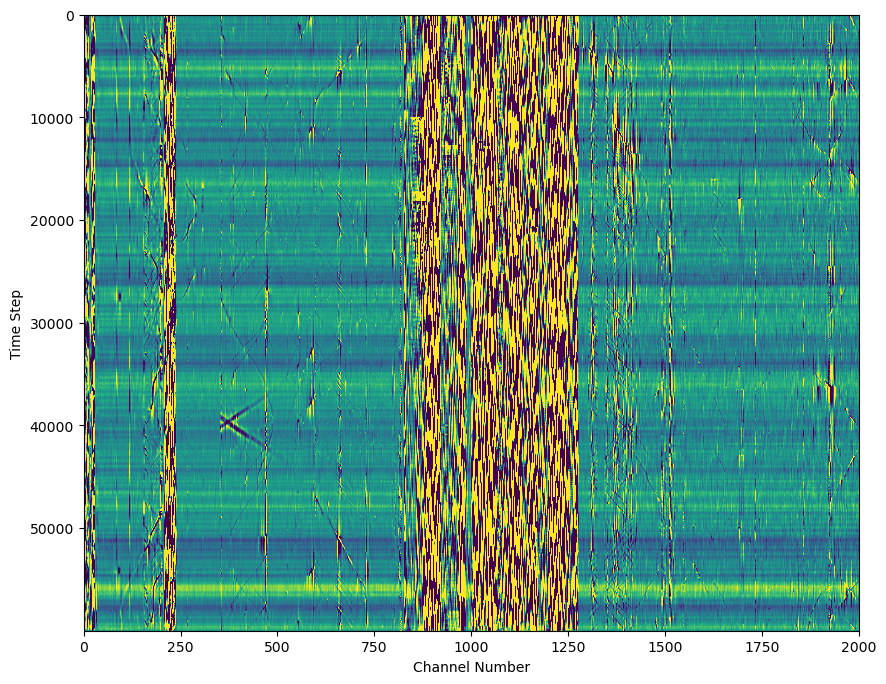

In [30]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,8))
plt.imshow(datafilter, aspect='auto', vmin=-1, vmax=1)
plt.title('total number with the filter')
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.xlim([0,2000])
#plt.ylim([7800, 9000])
plt.show()
#plt.colorbar()

We will choose other day but around 4 am seattle time

In [32]:
cable='seadasn'
record_length = 10 #minutes
#at night
#t0 = datetime.datetime(2022, 11, 10, 10, 41, 0) #2am local hours
t0 = datetime.datetime(2022, 11, 24, 12, 0, 0) #4am local hours

In [33]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

In [34]:
#We apply a pass band filter between 0.01 to 1 hz
from scipy.signal import butter, filtfilt
#defining outputs
b,a = butter(2,[0.01,1.0],'bandpass',fs=attrs['MaximumFrequency']*2)
datafilter=filtfilt(b,a,data,axis=0)

#datafilter=filtfilt(b,a,data[::20,:],axis=0)

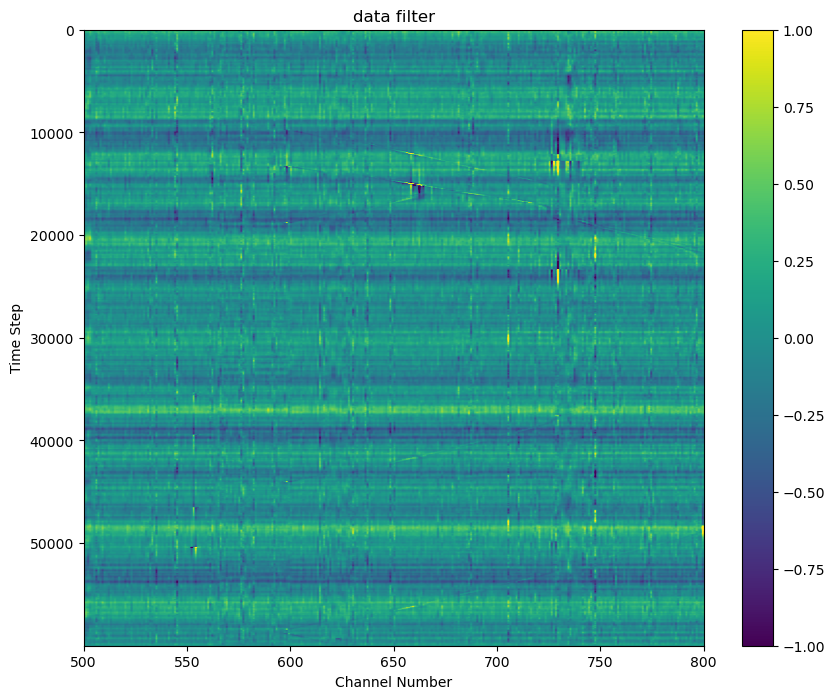

In [35]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,8))
plt.imshow(datafilter, aspect='auto', vmin=-1, vmax=1)
plt.title('data filter')
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.xlim(500,800)
plt.colorbar()
plt.show()


With the same filter and data record we can see that around 4 am is almost anything in the street.